### Importing Libraries

In [8]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import linear_model

### Loading Dataframes

In [9]:
#reading training data
traindf= pd.read_excel(r'\Users\sethi\OneDrive\Desktop\Data_file.xlsx',header=2)
#reading test data
testdf= pd.read_excel(r'\Users\sethi\OneDrive\Desktop\Test_data_file.xlsx')

In [10]:
#displaying data - top 5 rows of the dataset using head()

traindf.head()

,S.No.,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
0,1,Tier 1,Manager,Non-Metro,55523,3,66,19,71406.576531
1,2,Tier 2,Executive,Metro,57081,1,84,18,68005.870631
2,3,Tier 2,Executive,Metro,60347,2,52,28,76764.020277
3,4,Tier 3,Executive,Metro,49010,2,81,33,82092.386880
4,5,Tier 3,Executive,Metro,57879,4,74,32,73878.097729


In [11]:
#describing the training dataset.
traindf.describe()

,S.No.,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,669.500000,55581.762332,2.525411,59.890882,39.207025,75459.338993
std,386.391641,6685.600553,1.123502,14.894696,14.049960,12551.280263
min,1.000000,36990.000000,1.000000,35.000000,18.000000,53020.319026
25%,335.250000,50547.000000,2.000000,47.000000,27.000000,66905.070033
50%,669.500000,55293.500000,3.000000,60.000000,39.000000,73112.640487
75%,1003.750000,60150.500000,4.000000,73.000000,51.000000,80747.178420
max,1338.000000,77911.000000,4.000000,85.000000,64.000000,123416.994271


In [12]:
#dropping 'S.No.' column as python has automatic indentation.

del traindf["S.No."]

In [13]:
#Displaying information about the training dataset.
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   College               1338 non-null   object 
 1   Role                  1338 non-null   object 
 2   City type             1338 non-null   object 
 3   Previous CTC          1338 non-null   int64  
 4   Previous job changes  1338 non-null   int64  
 5   Graduation marks      1338 non-null   int64  
 6   Exp (Months)          1338 non-null   int64  
 7   CTC                   1338 non-null   float64
dtypes: float64(1), int64(4), object(3)
memory usage: 83.8+ KB


In [14]:
traindf.head()

,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
0,Tier 1,Manager,Non-Metro,55523,3,66,19,71406.576531
1,Tier 2,Executive,Metro,57081,1,84,18,68005.870631
2,Tier 2,Executive,Metro,60347,2,52,28,76764.020277
3,Tier 3,Executive,Metro,49010,2,81,33,82092.386880
4,Tier 3,Executive,Metro,57879,4,74,32,73878.097729


In [15]:
#displaying summary of the dataset

traindf.describe()

,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,55581.762332,2.525411,59.890882,39.207025,75459.338993
std,6685.600553,1.123502,14.894696,14.049960,12551.280263
min,36990.000000,1.000000,35.000000,18.000000,53020.319026
25%,50547.000000,2.000000,47.000000,27.000000,66905.070033
50%,55293.500000,3.000000,60.000000,39.000000,73112.640487
75%,60150.500000,4.000000,73.000000,51.000000,80747.178420
max,77911.000000,4.000000,85.000000,64.000000,123416.994271


In [16]:
#Displaying first 5 rows of test data
testdf.head() 

,College,Role,City type,College_T1,College_T2,Role_Manager,City_Metro,previous CTC,previous job changes,Graduation marks,...,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,Tier 1,Manager,Non-Metro,1,0,1,0,55523,3,66,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Tier 2,Executive,Metro,0,1,0,1,57081,1,84,...,NaN,32438.761916,4659.731658,-832.274662,19359.943901,4080.577268,0.451593,-29.041071,-3.65235,258.940639
2,Tier 2,Executive,Metro,0,1,0,1,60347,2,52,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Tier 3,Executive,Metro,0,0,0,1,49010,2,81,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Tier 3,Executive,Metro,0,0,0,1,57879,4,74,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Exploratory Data Analysis

In [17]:
#grouping data according to college tier

collegedf = traindf.groupby("College").sum()
collegedf.head()

,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
College,,,,,
Tier 1,35670161,1667,39026,25546,5.035953e+07
Tier 2,21155512,925,21894,14174,2.715483e+07
Tier 3,17542725,787,19214,12739,2.345024e+07


Text(0, 0.5, 'CTC')

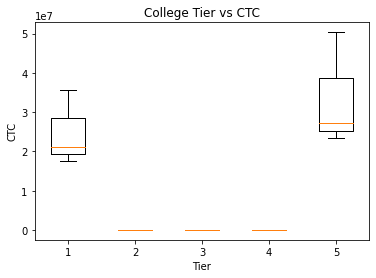

In [19]:
#displaying data as a candlestick box plot with respect to college tier

plt.boxplot(collegedf)          #using candlestick plot
plt.title("College Tier vs CTC")   #giving title to the graph
plt.xlabel("Tier")                 #Labeling the X-Axis
plt.ylabel("CTC")                  #Labeling the Y-Axis

In [20]:
#grouping data according to roles

roledf = traindf.groupby("Role").sum()
roledf.head()

,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
Role,,,,,
Executive,59062466,2695,63607,41906,7.605178e+07
Manager,15305932,684,16527,10553,2.491281e+07


Text(0, 0.5, 'CTC')

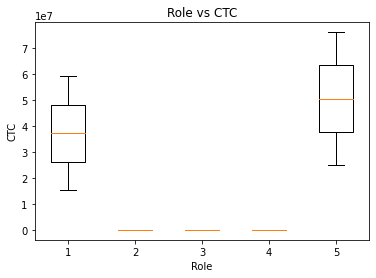

In [21]:
#displaying data as a candlestick box plot with respect to Roles

plt.boxplot(roledf)
plt.title("Role vs CTC")
plt.xlabel("Role")
plt.ylabel("CTC")

Text(0, 0.5, 'CTC')

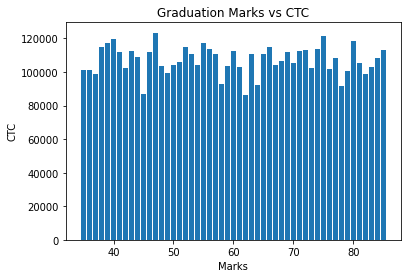

In [22]:
#displaying data as a bar plot with respect to Graduation Marks

x = traindf["Graduation marks"]      #assigning X-Axis values
y = traindf["CTC"]                   #assigning Y-Axis values
plt.bar(x,y)                            #using bar plot to make a bargraph
plt.title("Graduation Marks vs CTC")
plt.xlabel("Marks")
plt.ylabel("CTC")

Text(0, 0.5, 'CTC')

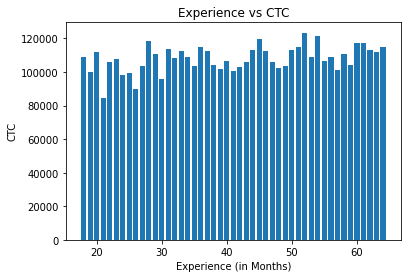

In [23]:
#displaying data as a bar plot with respect to Experience

x = traindf["Exp (Months)"]
y = traindf["CTC"]
plt.bar(x,y)
plt.title("Experience vs CTC")
plt.xlabel("Experience (in Months)")
plt.ylabel("CTC")

### Converting Categorial Variables to Numerical Variables

In [24]:
#Converting by using get_dummies

traindf =pd.get_dummies(traindf, drop_first=True)
traindf.head()

,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC,College_Tier 2,College_Tier 3,Role_Manager,City type_Non-Metro
0,55523,3,66,19,71406.576531,0,0,1,1
1,57081,1,84,18,68005.870631,1,0,0,0
2,60347,2,52,28,76764.020277,1,0,0,0
3,49010,2,81,33,82092.386880,0,1,0,0
4,57879,4,74,32,73878.097729,0,1,0,0


In [25]:
testdf = pd.get_dummies(testdf, drop_first=True)
testdf.head()

,College_T1,College_T2,Role_Manager,City_Metro,previous CTC,previous job changes,Graduation marks,Exp,Actual CTC,Predicted CTC,...,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,College_Tier 2,College_Tier 3,Role_Manager,City type_Non-Metro
0,1,0,1,0,55523,3,66,19,71406.576531,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,1
1,0,1,0,1,57081,1,84,18,68005.870631,NaN,...,19359.943901,4080.577268,0.451593,-29.041071,-3.65235,258.940639,1,0,0,0
2,0,1,0,1,60347,2,52,28,76764.020277,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0
3,0,0,0,1,49010,2,81,33,82092.386880,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0
4,0,0,0,1,57879,4,74,32,73878.097729,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0


### Training Linear Regression Model

In [26]:
#importing Linear Regression from the sklearn library

from sklearn.linear_model import LinearRegression 
reg = LinearRegression()

In [27]:
x = traindf.drop("CTC", axis = 1)
y = traindf["CTC"]

In [28]:
#fitting the data

reg.fit(x,y)

LinearRegression()

In [29]:
#predicting data

y_prd = reg.predict(x)
print("Predictions:", y_prd)

Predictions: [86123.93814045 65789.54652723 69941.69030152 ... 64046.07444784
 66223.22234281 90794.94065705]


### Evaluating Results

In [30]:
#importing Mean Squared Error Metric from sklearn library

from sklearn.metrics import mean_squared_error

In [31]:
#calculating and printing Mean Squared Error

print('Mean Squared Error:', mean_squared_error(y, y_prd))

Mean Squared Error: 61677937.0453096


### Predicting

In [34]:
#predicting the testing model

pred = pd.concat([testdf, pd.DataFrame(y_prd, columns=["Predicted CTC"])], axis=1)

In [35]:
pred = predicted[["College_Tier 2", "College_Tier 3", "City type_Non-Metro", "Graduation marks", "Role_Manager", "Actual CTC", "Predicted CTC"]]

In [36]:
#final Result

pred.head()

,College_Tier 2,College_Tier 3,City type_Non-Metro,Graduation marks,Role_Manager,Role_Manager,Actual CTC,Predicted CTC,Predicted CTC
0,0,0,1,66,1,1,71406.576531,NaN,86123.938140
1,1,0,0,84,0,0,68005.870631,NaN,65789.546527
2,1,0,0,52,0,0,76764.020277,NaN,69941.690302
3,0,1,0,81,0,0,82092.386880,NaN,66843.038384
4,0,1,0,74,0,0,73878.097729,NaN,70556.761762
